# Unit Test 작성 및 코드 검증

- pytest보다 먼저 ipytest를 설치하여서 Jupyter Notebook 환경에서 Unit Test를 구성을 진행하겠습니다.

In [ ]:
pip install ipytest

In [7]:
# ipytest를 활용한 기본 Unit Test
import numpy as np
import ipytest
import cv2

In [3]:
# 샘플 함수 : 가짜 깊이 맵 생성
def generate_depth_map(image):
    if image is None:
        raise ValueError("입력된 이미지가 없습니다.")
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 가짜 깊이 맵 적용
    depth_map = cv2.applyColorMap(grayscale, cv2.COLORMAP_JET)
    return depth_map

In [4]:
# 테스트 코드
def test_generate_depth_map():
    image = np.zeros((100, 100, 3), dtype=np.uint8) # 검정색 빈 이미지
    depth_map = generate_depth_map(image)

    # assert : 조건이 True인지 확인
    assert depth_map.shape == image.shape, "출력 크기가 입력 크기와 다릅니다."
    assert isinstance(depth_map, np.ndarray), "출력 타입이 ndarray가 아닙니다."

In [9]:
# ipytest 실행
ipytest.run()

======================================= test session starts =======================================
platform win32 -- Python 3.8.20, pytest-8.3.5, pluggy-1.5.0
rootdir: c:\Users\ASUS\Desktop\코멘토 직무 부트캠프\컴퓨터 비전 캠프\Comento_Computer-Vision\task2\test
plugins: anyio-4.5.0
collected 1 item

t_0ac172f9b97f46dcac7837c4f819c4fe.py .                                                      [100%]

======================================== 1 passed in 0.02s ========================================


<ExitCode.OK: 0>

테스트가 잘 진행되었으니 직접 실행해보기

In [ ]:
test_image = np.zeros((100, 100, 3), dtype=np.uint8) # 검정색 빈 이미지
depth_map = generate_depth_map(test_image)
print("깊이 맵 생성 완료, 출력 크기:", depth_map.shape)

깊이 맵 생성 완료, 출력 크기: (100, 100, 3)


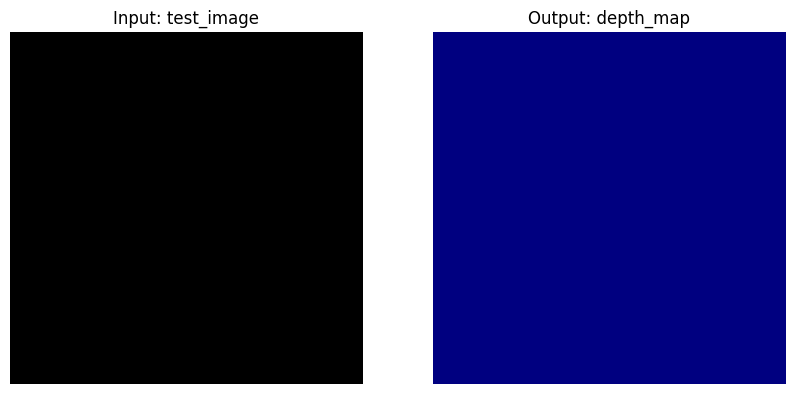

이미지 크기: (100, 100, 3)
데이터 타입: <class 'numpy.ndarray'>


In [15]:
# 시각화 해보기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Input: test_image')
plt.imshow(test_image) # 검정색 이미지
plt.axis('off')

depth_map_matplotlib = cv2.cvtColor(depth_map, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 2)
plt.title("Output: depth_map")
plt.imshow(depth_map_matplotlib)
plt.axis('off')

plt.show()

print(f'이미지 크기: {depth_map.shape}')
print(f'데이터 타입: {type(depth_map)}')

---

### 2D -> 3D 변환 알고리즘 구현

- Depth Map을 생성하고 이를 기반으로 3D 포인트 클라우드 생성

In [ ]:
# 기본적인 Depth Map 생성
import cv2
import numpy as np

# 이미지 로드
image = cv2.imread()